In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve

In [2]:
# Cargar el dataset
df = pd.read_csv('student_depression_dataset.csv')

In [3]:
# Eliminar columnas innecesarias o problemáticas
# Se eliminan 'id' por ser un simple identificador y 'City' por su alta cardinalidad.
df_cleaned = df.drop(['id', 'City'], axis=1)

In [4]:
# Corregir tipos de datos incorrectos
# La columna 'Age' se convierte a entero, ya que la edad no debe ser flotante.
df_cleaned['Age'] = df_cleaned['Age'].astype(int)

In [5]:
# Se eliminan las comillas simples en la columna 'Sleep Duration'.
df_cleaned['Sleep Duration'] = df_cleaned['Sleep Duration'].str.replace("'", "")

In [6]:
# Convertir y limpiar la columna 'Financial Stress'
# Se convierte a tipo numérico, los errores se manejan como NaN.
df_cleaned['Financial Stress'] = pd.to_numeric(df_cleaned['Financial Stress'], errors='coerce')
# Se imputan los valores nulos (generados por la coerción) con la mediana de la columna.
df_cleaned['Financial Stress'].fillna(df_cleaned['Financial Stress'].median(), inplace=True)

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\2762308207.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Financial Stress'].fillna(df_cleaned['Financial Stress'].median(), inplace=True)


In [7]:
# Se utiliza One-Hot Encoding para convertir las columnas de texto a formato numérico.
# 'drop_first=True' se usa para evitar la multicolinealidad.
df_processed = pd.get_dummies(df_cleaned, drop_first=True)

In [8]:
df_processed.head()

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression,Gender_Male,...,Degree_MBBS,Degree_MCA,Degree_MD,Degree_ME,Degree_MHM,Degree_MSc,Degree_Others,Degree_PhD,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33,5.0,0.0,8.97,2.0,0.0,3.0,1.0,1,True,...,False,False,False,False,False,False,False,False,True,False
1,24,2.0,0.0,5.90,5.0,0.0,3.0,2.0,0,False,...,False,False,False,False,False,False,False,False,False,True
2,31,3.0,0.0,7.03,5.0,0.0,9.0,1.0,0,True,...,False,False,False,False,False,False,False,False,False,True
3,28,3.0,0.0,5.59,2.0,0.0,4.0,5.0,1,False,...,False,False,False,False,False,False,False,False,True,True
4,25,4.0,0.0,8.13,3.0,0.0,1.0,1.0,0,False,...,False,False,False,False,False,False,False,False,True,False


In [9]:
print(df_processed.shape)

(27901, 59)


In [10]:
df_processed.to_csv('student_depression_dataset_processed.csv', index=False)

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\260499965.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Depression', data=df_cleaned, palette='pastel')


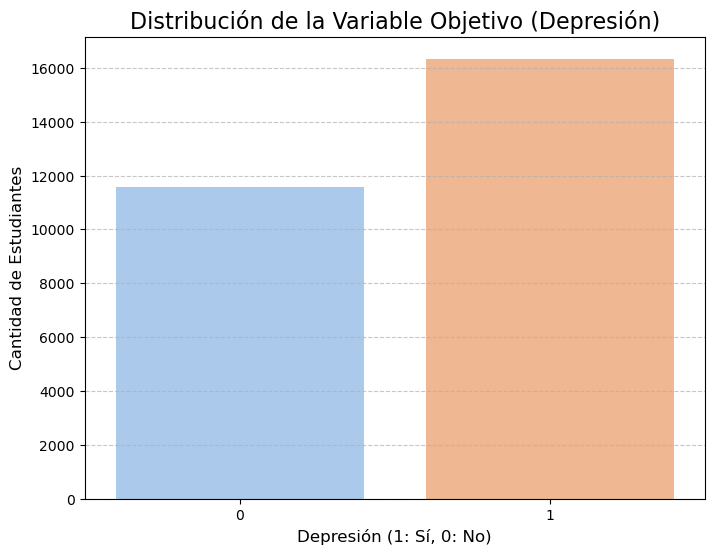

In [11]:
# Gráfico 1: Distribución de la Variable Objetivo (Depresión)
plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=df_cleaned, palette='pastel')
plt.title('Distribución de la Variable Objetivo (Depresión)', fontsize=16)
plt.xlabel('Depresión (1: Sí, 0: No)', fontsize=12)
plt.ylabel('Cantidad de Estudiantes', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

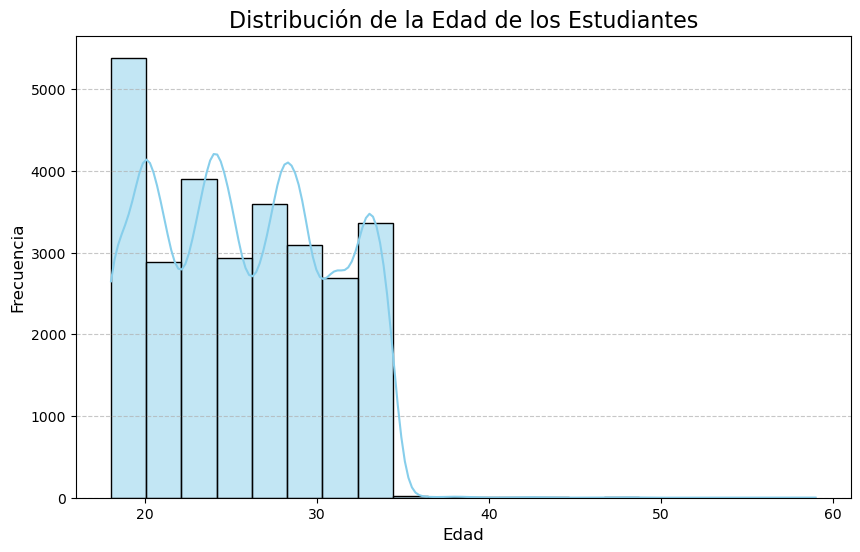

In [12]:
# Gráfico 2: Distribución de la Edad
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Age'], kde=True, bins=20, color='skyblue')
plt.title('Distribución de la Edad de los Estudiantes', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


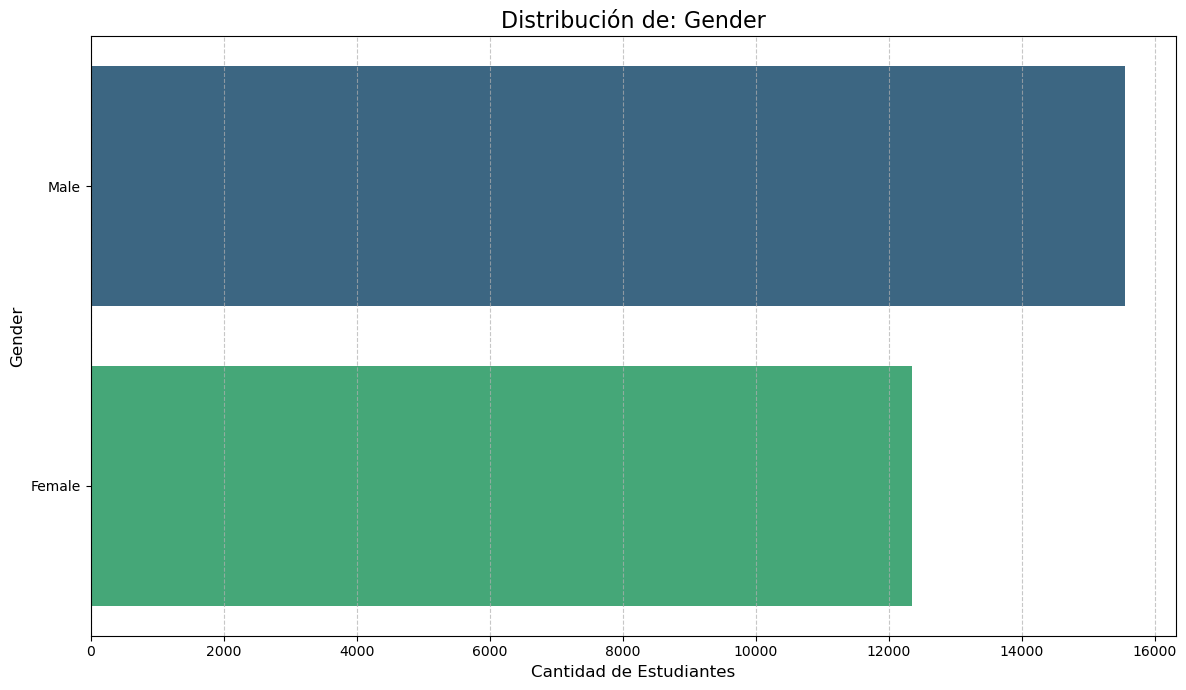

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


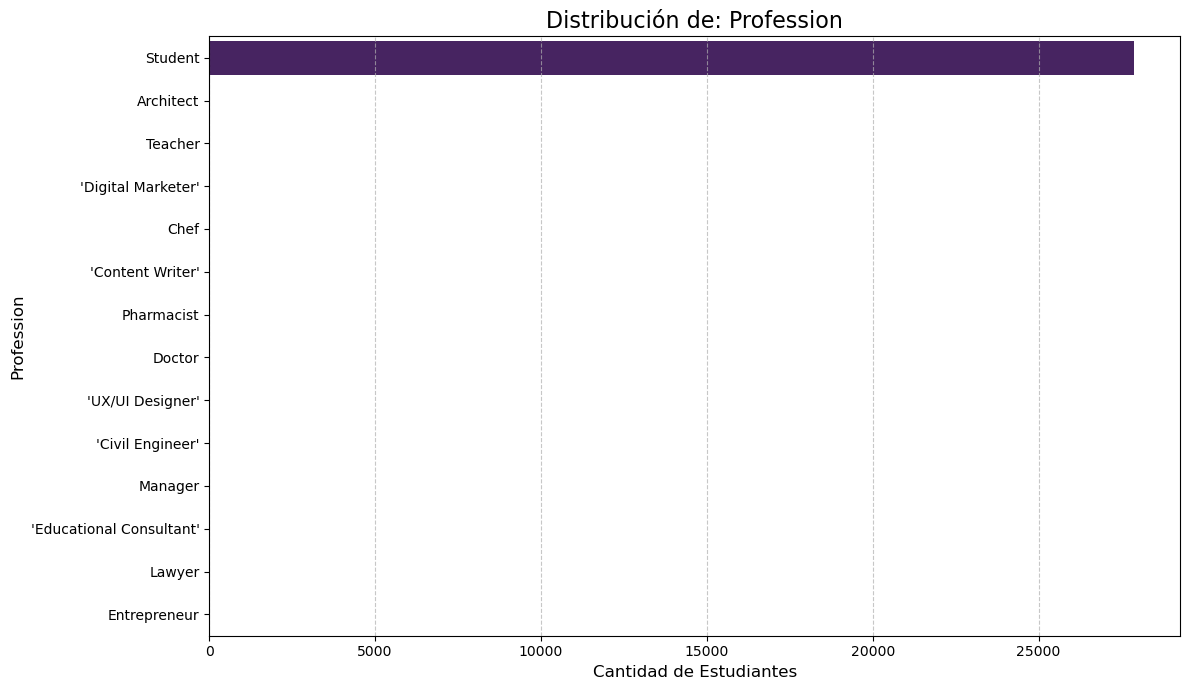

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


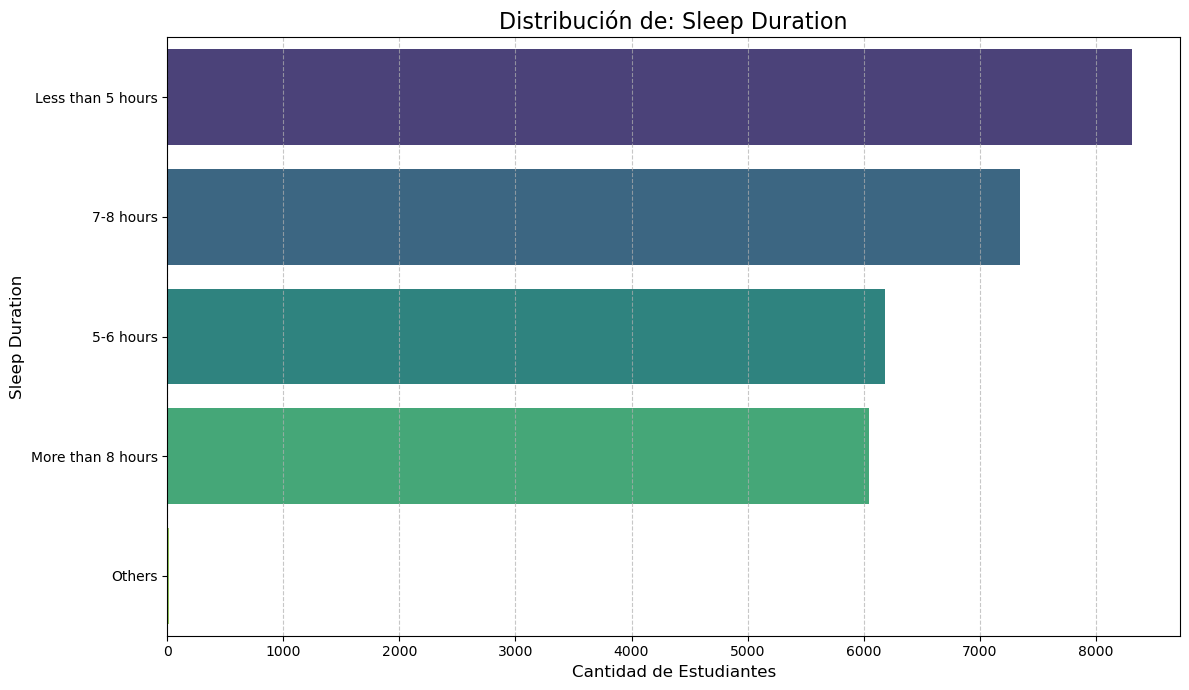

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


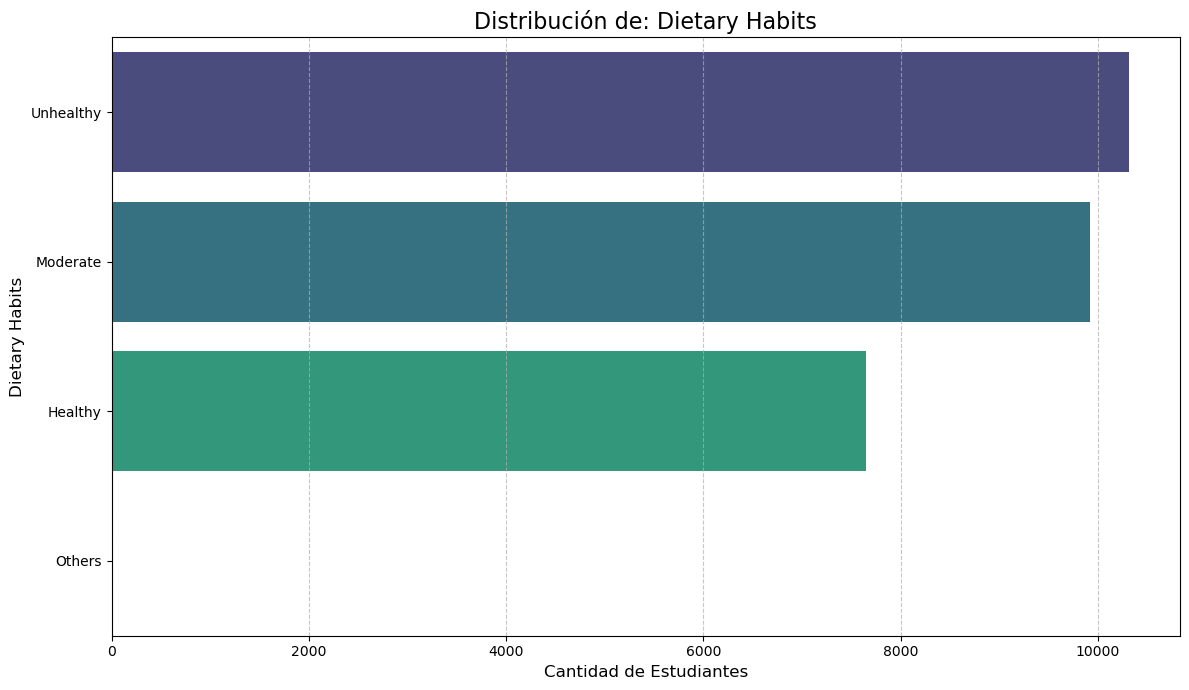

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


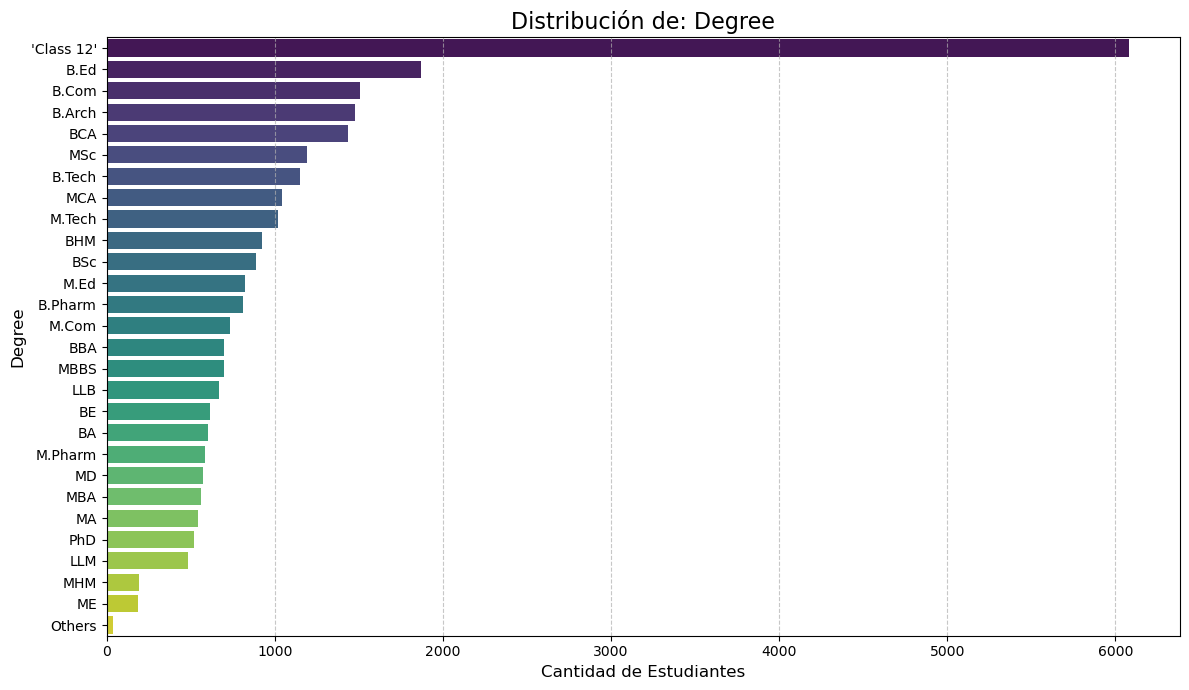

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


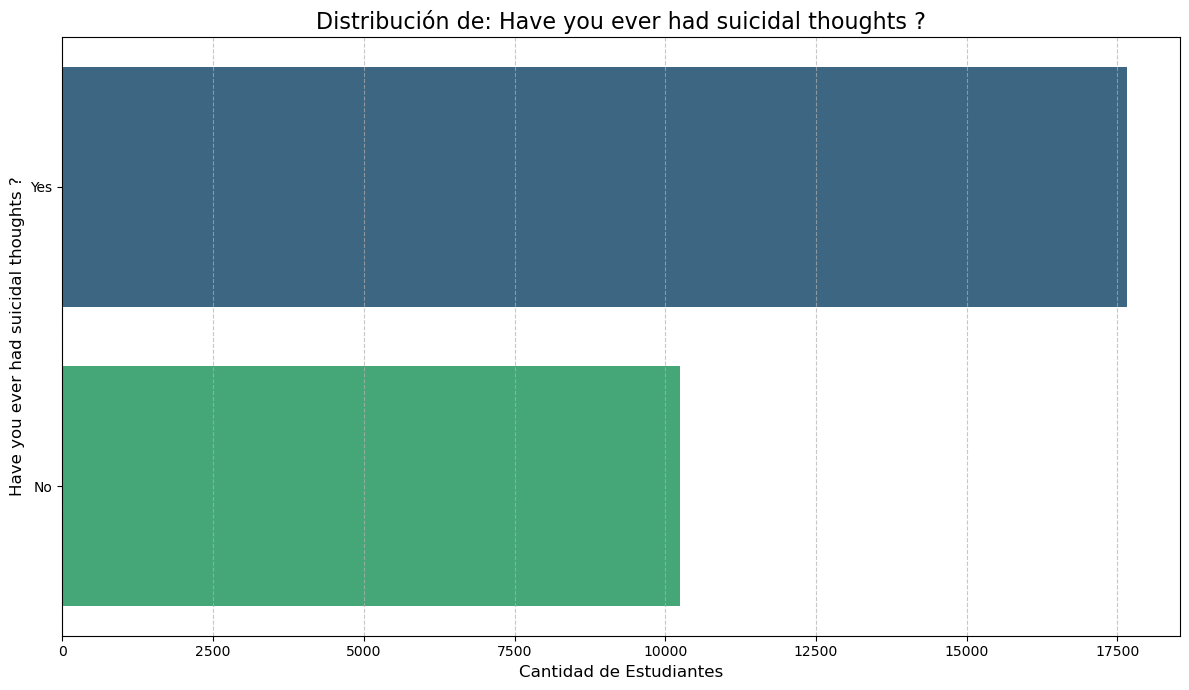

C:\Users\Zerfert\AppData\Local\Temp\ipykernel_13944\3499570915.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)


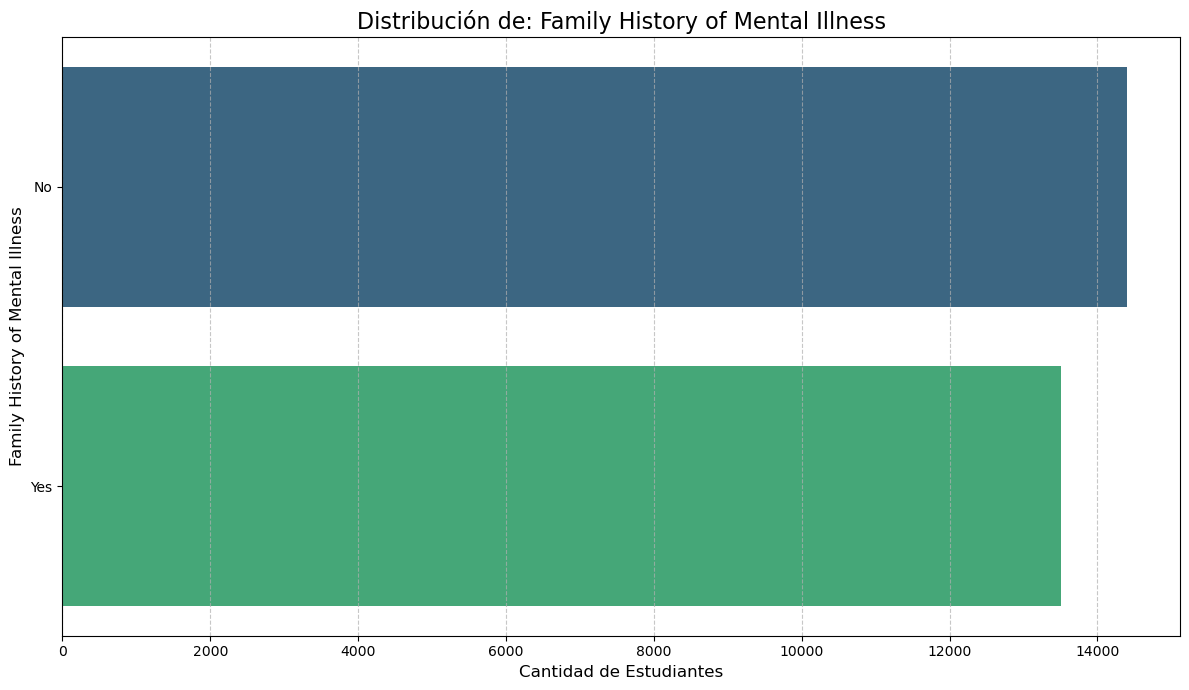

In [13]:
# Gráfico 3: Distribución de las principales variables categóricas
categorical_features = [
    'Gender', 'Profession', 'Sleep Duration', 'Dietary Habits',
    'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness'
]

for feature in categorical_features:
    plt.figure(figsize=(12, 7))
    sns.countplot(y=feature, data=df_cleaned, palette='viridis', order=df_cleaned[feature].value_counts().index)
    plt.title(f'Distribución de: {feature}', fontsize=16)
    plt.xlabel('Cantidad de Estudiantes', fontsize=12)
    plt.ylabel(feature, fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


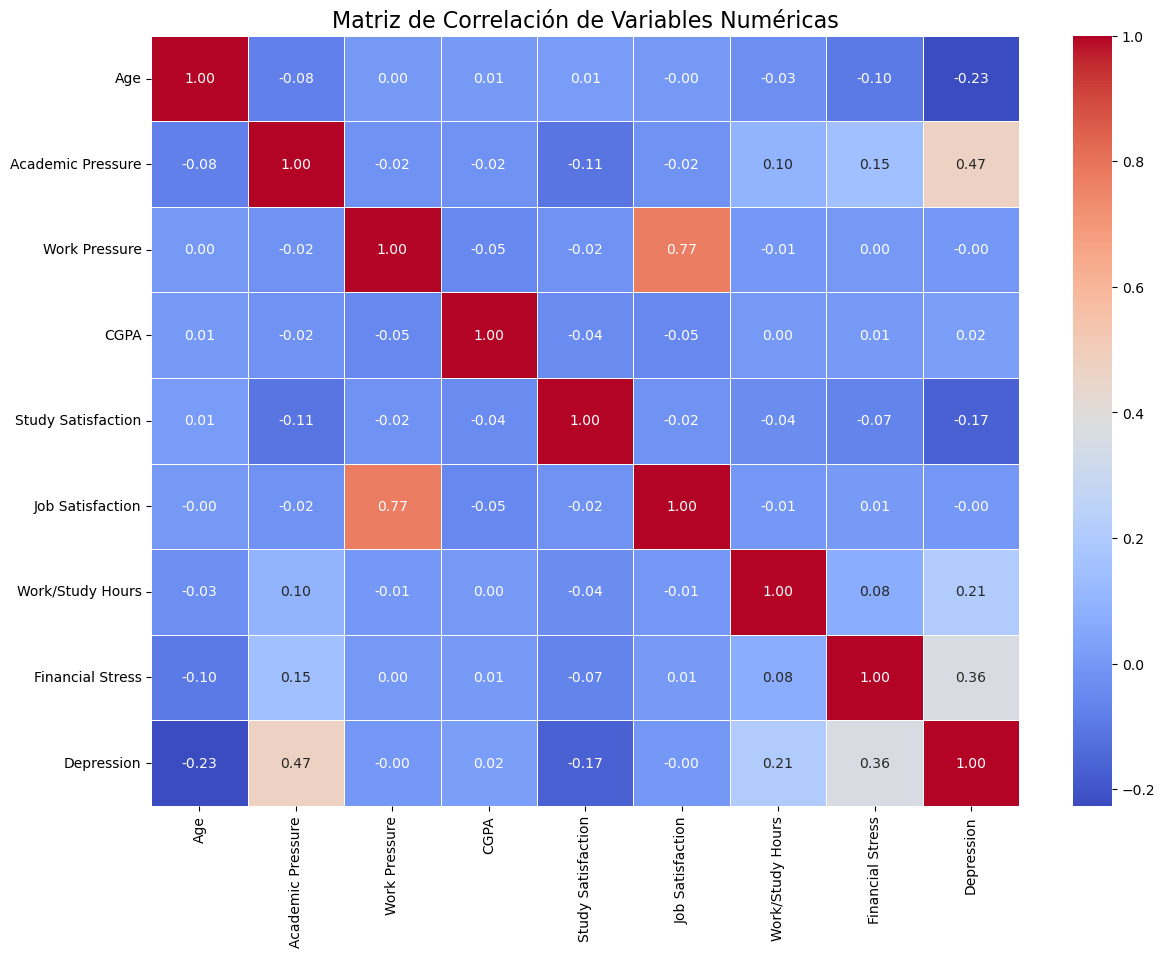

In [14]:
# Gráfico 4: Matriz de correlación para variables numéricas
plt.figure(figsize=(14, 10))
numeric_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación de Variables Numéricas', fontsize=16)
plt.show()

In [15]:
# Separar las características (X) y la variable objetivo (y) del DataFrame ya procesado
X = df_processed.drop('Depression', axis=1)
y = df_processed['Depression']

# Guardar los nombres de las columnas para referencia
feature_names = X.columns

print("--- Seleccionando las 8 variables más relevantes con RFE y Regresión Logística ---")

# 1. Crear el modelo base que se usará para evaluar las características
# Se usará la Regresión Logística como lo indica el planteamiento del proyecto.
logreg = LogisticRegression(solver='liblinear', max_iter=200)

# 2. Crear el selector RFE para elegir las 8 mejores características
# Este método entrena el modelo de forma recursiva, eliminando la variable menos importante
# en cada paso hasta que queden las 8 mejores.
rfe_selector = RFE(estimator=logreg, n_features_to_select=8, step=1)

# 3. Entrenar el selector RFE con los datos
rfe_selector.fit(X, y)

# 4. Obtener y mostrar las características seleccionadas
selected_features_mask = rfe_selector.support_
selected_features = feature_names[selected_features_mask]

print(f"\nLas 8 variables más relevantes seleccionadas para el modelo son:")
for feature in selected_features:
    print(f"- {feature}")

# 5. (Opcional) Crear un nuevo DataFrame solo con las características seleccionadas
X_top8 = X[selected_features]

print("\n\nDataFrame con las 8 características principales:")
print(X_top8.head())

--- Seleccionando las 8 variables más relevantes con RFE y Regresión Logística ---

Las 8 variables más relevantes seleccionadas para el modelo son:
- Academic Pressure
- Financial Stress
- Profession_'Digital Marketer'
- Profession_Student
- Profession_Teacher
- Dietary Habits_Moderate
- Dietary Habits_Unhealthy
- Have you ever had suicidal thoughts ?_Yes


DataFrame con las 8 características principales:
   Academic Pressure  Financial Stress  Profession_'Digital Marketer'  \
0                5.0               1.0                          False   
1                2.0               2.0                          False   
2                3.0               1.0                          False   
3                3.0               5.0                          False   
4                4.0               1.0                          False   

   Profession_Student  Profession_Teacher  Dietary Habits_Moderate  \
0                True               False                    False   
1          

In [16]:
# Usaremos X_top8 (creado en el bloque anterior) y 'y' para la división.
# X_top8 contiene solo las 8 características más relevantes.
# y contiene la variable objetivo ('Depression').

# Dividir los datos: 80% para entrenamiento y 20% para prueba
# test_size=0.2: Especifica que el 20% de los datos se usará para el conjunto de prueba.
# random_state=42: Asegura que la división sea siempre la misma cada vez que se ejecute el código,
#                  lo que garantiza la reproducibilidad de los resultados.
# stratify=y: Es muy importante para problemas de clasificación. Asegura que la proporción
#             de estudiantes con y sin depresión sea la misma tanto en el conjunto de
#             entrenamiento como en el de prueba.
X_train, X_test, y_train, y_test = train_test_split(
    X_top8,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verificar las dimensiones de los conjuntos de datos resultantes
print("División de datos completada con éxito.\n")
print(f"Dimensiones del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Dimensiones del conjunto de prueba (X_test):      {X_test.shape}")
print(f"Dimensiones de las etiquetas de entrenamiento (y_train): {y_train.shape}")
print(f"Dimensiones de las etiquetas de prueba (y_test):      {y_test.shape}")

División de datos completada con éxito.

Dimensiones del conjunto de entrenamiento (X_train): (22320, 8)
Dimensiones del conjunto de prueba (X_test):      (5581, 8)
Dimensiones de las etiquetas de entrenamiento (y_train): (22320,)
Dimensiones de las etiquetas de prueba (y_test):      (5581,)


In [17]:
# Lista de TODAS las posibles columnas numéricas del dataset original
all_possible_numeric_features = [
    'Age',
    'Academic Pressure',
    'CGPA',
    'Work/Study Hours',
    'Financial Stress'
]

# Identificar dinámicamente cuáles de estas columnas SÍ ESTÁN en nuestro X_train
# (que ahora solo tiene 8 columnas)
numeric_features_to_scale = [
    feature for feature in all_possible_numeric_features if feature in X_train.columns
]

print(f"Columnas numéricas que se van a escalar (de las 8 seleccionadas): {numeric_features_to_scale}\n")

# Crear una instancia del escalador
scaler = StandardScaler()

# 1. Ajustar el escalador SÓLO con los datos de entrenamiento de las columnas identificadas
# Se crean copias para trabajar de forma segura
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler.fit(X_train[numeric_features_to_scale])

# 2. Transformar los datos de entrenamiento y de prueba
X_train_scaled[numeric_features_to_scale] = scaler.transform(X_train[numeric_features_to_scale])
X_test_scaled[numeric_features_to_scale] = scaler.transform(X_test[numeric_features_to_scale])

# Verificar el resultado mostrando las primeras filas del conjunto de entrenamiento escalado
print("Escalado de características completado.")
print("Las columnas numéricas ahora están estandarizadas:\n")
print(X_train_scaled.head())

Columnas numéricas que se van a escalar (de las 8 seleccionadas): ['Academic Pressure', 'Financial Stress']

Escalado de características completado.
Las columnas numéricas ahora están estandarizadas:

       Academic Pressure  Financial Stress  Profession_'Digital Marketer'  \
1657            0.620758          1.298596                          False   
24995          -0.104993         -1.486784                          False   
27613          -0.104993          1.298596                          False   
13512          -0.104993         -0.094094                          False   
27029          -0.104993          1.298596                          False   

       Profession_Student  Profession_Teacher  Dietary Habits_Moderate  \
1657                 True               False                     True   
24995                True               False                     True   
27613                True               False                    False   
13512                True               

In [18]:
# 1. Crear una instancia del modelo de Regresión Logística
# Se utiliza el solver 'liblinear' que es eficiente para este tipo de problemas
# y un random_state para asegurar la reproducibilidad.
logreg_model = LogisticRegression(solver='liblinear', random_state=42)

# 2. Entrenar el modelo con los datos de entrenamiento escalados
# El método .fit() es el que realiza el "aprendizaje"
print("Entrenando el modelo de Regresión Logística...")
logreg_model.fit(X_train_scaled, y_train)

print("\n¡Entrenamiento completado con éxito! ✅")
print("El modelo 'logreg_model' ahora está listo para hacer predicciones y ser evaluado.")


Entrenando el modelo de Regresión Logística...

¡Entrenamiento completado con éxito! ✅
El modelo 'logreg_model' ahora está listo para hacer predicciones y ser evaluado.


In [19]:
# 1. Usar el modelo entrenado ('logreg_model') para hacer predicciones
#    Se utilizan los datos de prueba escalados (X_test_scaled)
print("Realizando predicciones con los datos de prueba...")
y_pred = logreg_model.predict(X_test_scaled)


# 2. (Opcional) Mostrar las primeras 20 predicciones
# El resultado será un array de 0s y 1s.
# 1 = El modelo predice que el estudiante tiene depresión.
# 0 = El modelo predice que el estudiante no tiene depresión.
print("\n¡Predicciones completadas!")
print("Las primeras 20 predicciones del modelo son:\n")
print(y_pred[:20])

# También podemos ver la probabilidad de la predicción con predict_proba()
# Esto es muy útil para entender la "confianza" del modelo en su predicción.
# Devuelve dos columnas: la probabilidad para la clase 0 y la probabilidad para la clase 1.
y_pred_proba = logreg_model.predict_proba(X_test_scaled)

print("\n\nProbabilidades de las primeras 5 predicciones (Clase 0, Clase 1):")
print(y_pred_proba[:5])

Realizando predicciones con los datos de prueba...

¡Predicciones completadas!
Las primeras 20 predicciones del modelo son:

[1 1 1 0 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 0]


Probabilidades de las primeras 5 predicciones (Clase 0, Clase 1):
[[0.11318539 0.88681461]
 [0.18714515 0.81285485]
 [0.49165304 0.50834696]
 [0.5306051  0.4693949 ]
 [0.49165304 0.50834696]]


--- Métricas de Evaluación ---
Exactitud (Accuracy) del modelo: 0.82

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.81      0.74      0.78      2313
           1       0.83      0.88      0.85      3268

    accuracy                           0.82      5581
   macro avg       0.82      0.81      0.81      5581
weighted avg       0.82      0.82      0.82      5581


--- Matriz de Confusión ---


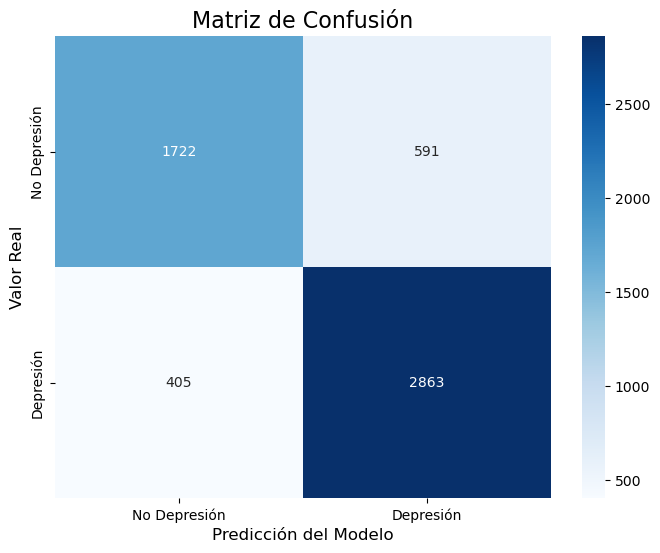


--- Curva ROC y Área Bajo la Curva (AUC) ---
Área Bajo la Curva (AUC): 0.90


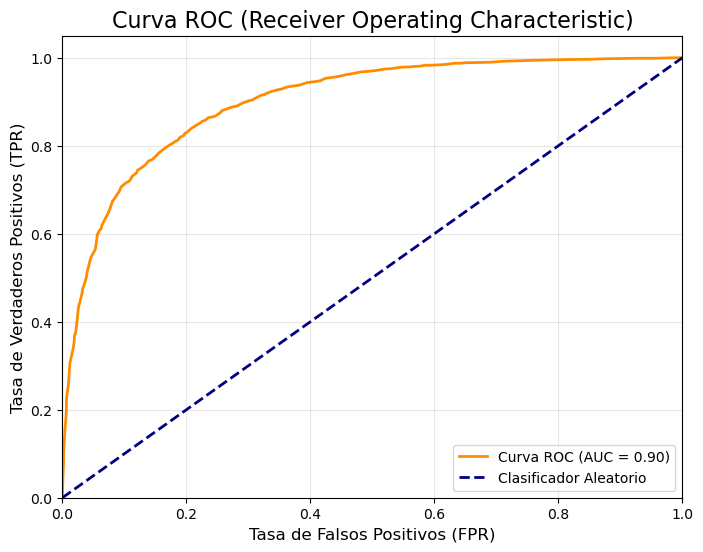

In [20]:
# 1. Reporte de Clasificación y Exactitud
print("--- Métricas de Evaluación ---")
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud (Accuracy) del modelo: {accuracy:.2f}\n")

print("Reporte de Clasificación:")
# Muestra métricas clave como Precisión, Recall y F1-Score para cada clase.
# 0 = No Depresión, 1 = Depresión
print(classification_report(y_test, y_pred))


# 2. Matriz de Confusión
print("\n--- Matriz de Confusión ---")
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Depresión', 'Depresión'],
            yticklabels=['No Depresión', 'Depresión'])
plt.title('Matriz de Confusión', fontsize=16)
plt.ylabel('Valor Real', fontsize=12)
plt.xlabel('Predicción del Modelo', fontsize=12)
plt.show()


# 3. Curva ROC y Área Bajo la Curva (AUC)
print("\n--- Curva ROC y Área Bajo la Curva (AUC) ---")

# Obtener las probabilidades de predicción para la clase positiva (Depresión = 1)
y_pred_proba = logreg_model.predict_proba(X_test_scaled)[:, 1]

# Calcular el área bajo la curva
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Área Bajo la Curva (AUC): {auc:.2f}")

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Graficar la Curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Clasificador Aleatorio')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)', fontsize=12)
plt.ylabel('Tasa de Verdaderos Positivos (TPR)', fontsize=12)
plt.title('Curva ROC (Receiver Operating Characteristic)', fontsize=16)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [21]:
# 1. Obtener los coeficientes del modelo entrenado
coefficients = logreg_model.coef_[0]

# 2. Crear un DataFrame para asociar cada característica con su coeficiente
# Se usarán las columnas del DataFrame de entrenamiento escalado.
feature_importance = pd.DataFrame({
    'Característica': X_train_scaled.columns,
    'Coeficiente': coefficients
})

# 3. Ordenar el DataFrame por el valor del coeficiente para una mejor interpretación
feature_importance = feature_importance.sort_values(by='Coeficiente', ascending=False)

# 4. Mostrar los resultados
print("--- Interpretación de los Coeficientes del Modelo de Regresión Logística ---")
print("\nUn coeficiente positivo aumenta la probabilidad de depresión.")
print("Un coeficiente negativo disminuye la probabilidad de depresión.\n")

print(feature_importance)

--- Interpretación de los Coeficientes del Modelo de Regresión Logística ---

Un coeficiente positivo aumenta la probabilidad de depresión.
Un coeficiente negativo disminuye la probabilidad de depresión.

                              Característica  Coeficiente
7  Have you ever had suicidal thoughts ?_Yes     2.480790
0                          Academic Pressure     1.150399
6                   Dietary Habits_Unhealthy     1.070014
1                           Financial Stress     0.815035
5                    Dietary Habits_Moderate     0.480073
4                         Profession_Teacher     0.150835
2              Profession_'Digital Marketer'    -0.435452
3                         Profession_Student    -1.475329


In [22]:
def predict_depression_with_guided_prompts():
    """
    Pide los datos de un estudiante con preguntas guiadas y en español,
    basándose en las características que el modelo seleccionó.
    """
    print("--- Ingrese los datos del estudiante para la predicción ---")
    print("Por favor, responda a las siguientes preguntas con los valores indicados.")

    # Diccionario con preguntas claras y en español para cada posible característica
    prompt_map = {
        # Datos Personales y Demográficos
        'Age': "Edad del estudiante (ej: 25): ",
        'Gender_Male': "¿El género es masculino? (1=Sí, 0=No): ",

        # Datos Académicos y Laborales
        'Academic Pressure': "Nivel de Presión Académica (1=Baja, 5=Alta): ",
        'Work Pressure': "Nivel de Presión Laboral (1=Baja, 5=Alta): ",
        'CGPA': "Promedio de Calificaciones (ej: 8.5): ",
        'Work/Study Hours': "Horas de estudio/trabajo por día (ej: 6): ",
        'Study Satisfaction': "Nivel de Satisfacción con los estudios (1=Baja, 5=Alta): ",
        'Job Satisfaction': "Nivel de Satisfacción con el trabajo (1=Baja, 5=Alta): ",
        'Profession_Student': "¿Es actualmente un estudiante de tiempo completo? (1=Sí, 0=No): ",
        'Profession_Engineer': "¿La profesión es Ingeniero/a? (1=Sí, 0=No): ",
        'Profession_Teacher': "¿La profesión es Profesor/a? (1=Sí, 0=No): ",
        'Profession_Doctor': "¿La profesión es Médico/a? (1=Sí, 0=No): ",
        "Profession_'Digital Marketer'": "¿La profesión es Marketer Digital? (1=Sí, 0=No): ",
        'Degree_BE': "¿El título es 'BE' (Licenciatura en Ingeniería)? (1=Sí, 0=No): ",
        'Degree_BSc': "¿El título es 'BSc' (Licenciatura en Ciencias)? (1=Sí, 0=No): ",
        'Degree_MBBS': "¿El título es 'MBBS' (Licenciatura en Medicina y Cirugía)? (1=Sí, 0=No): ",

        # Salud, Bienestar y Factores Psicológicos
        'Financial Stress': "Nivel de Estrés Financiero (1=Bajo, 5=Alto): ",
        'Have you ever had suicidal thoughts?_Yes': "¿Alguna vez ha tenido pensamientos suicidas? (1=Sí, 0=No): ",
        'Family History of Mental Illness_Yes': "¿Tiene antecedentes familiares de enfermedades mentales? (1=Sí, 0=No): ",
        "Sleep Duration_'5-6 hours'": "¿Duerme entre 5 y 6 horas por noche? (1=Sí, 0=No): ",
        "Sleep Duration_'7-8 hours'": "¿Duerme entre 7 y 8 horas por noche? (1=Sí, 0=No): ",
        "Sleep Duration_'<5 hours'": "¿Duerme menos de 5 horas por noche? (1=Sí, 0=No): ",
        'Dietary Habits_Unhealthy': "¿Sus hábitos alimenticios son poco saludables? (1=Sí, 0=No): ",
        'Dietary Habits_Moderate': "¿Sus hábitos alimenticios son moderados/regulares? (1=Sí, 0=No): "
    }

    user_data = {}

    try:
        # Petición de datos dinámica basada en las 8 características seleccionadas
        for feature in selected_features:
            # Usar la pregunta del diccionario si existe; si no, crear una por defecto
            prompt = prompt_map.get(feature, f"Ingrese valor para '{feature.replace('_', ' ')}' (1=Sí, 0=No): ")
            user_data[feature] = [float(input(prompt))]

    except ValueError:
        print("\nError: Por favor, ingrese solo valores numéricos.")
        return

    # Convertir los datos a un DataFrame con el orden de columnas correcto
    input_df = pd.DataFrame(user_data, columns=selected_features)

    # Preprocesamiento y Predicción
    input_df_scaled = input_df.copy()
    numeric_features_in_input = [col for col in numeric_features_to_scale if col in input_df_scaled.columns]

    if numeric_features_in_input:
        input_df_scaled[numeric_features_in_input] = scaler.transform(input_df_scaled[numeric_features_in_input])

    prediction_proba = logreg_model.predict_proba(input_df_scaled)
    prediction = logreg_model.predict(input_df_scaled)
    probability_of_depression = prediction_proba[0][1]

    # Mostrar el resultado
    print("\n--- Resultado de la Predicción ---")
    if prediction[0] == 1:
        print(f"✅ Resultado: Es PROBABLE que el estudiante presente síntomas de depresión.")
    else:
        print(f"✅ Resultado: Es POCO PROBABLE que el estudiante presente síntomas de depresión.")

    print(f"Confianza de la predicción (Probabilidad de depresión): {probability_of_depression:.2%}")

# Llamar a la función para iniciar la predicción
predict_depression_with_guided_prompts()

--- Ingrese los datos del estudiante para la predicción ---
Por favor, responda a las siguientes preguntas con los valores indicados.

--- Resultado de la Predicción ---
✅ Resultado: Es PROBABLE que el estudiante presente síntomas de depresión.
Confianza de la predicción (Probabilidad de depresión): 100.00%
